In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [3]:
#!pip install pydot

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [6]:
#!pip install tensorflow==2.7.0

In [7]:
(X_train_digit,y_train_digit),(X_test_digit,y_test_digit)=mnist.load_data()

In [8]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

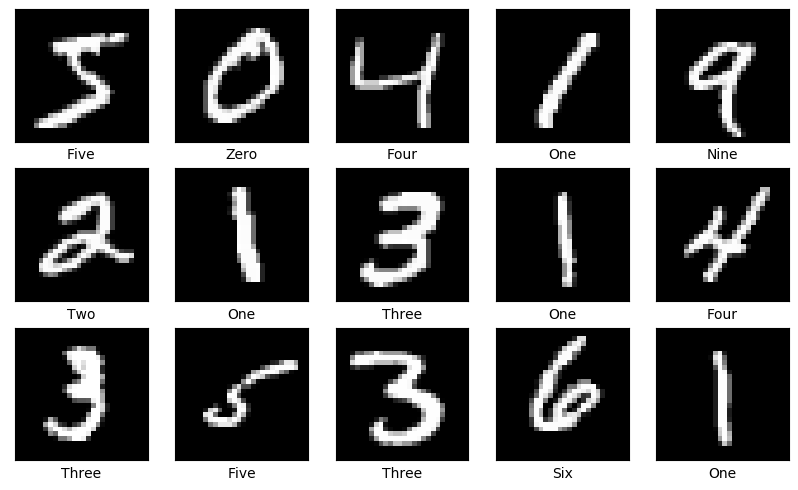

In [10]:
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [11]:
X_train_digit.shape

(60000, 28, 28)

In [12]:
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)

In [13]:
X_train_digit.shape

(60000, 784)

In [14]:
y_test_digit.shape

(10000,)

In [15]:
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [16]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history=model.fit(X_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 9s 13ms/step - loss: 1.3336 - accuracy: 0.8310 - val_loss: 0.3511 - val_accuracy: 0.9121
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2628 - accuracy: 0.9285 - val_loss: 0.2209 - val_accuracy: 0.9428
Epoch 3/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1812 - accuracy: 0.9487 - val_loss: 0.2089 - val_accuracy: 0.9475
Epoch 4/10
600/600 [==============================] - 27s 45ms/step - loss: 0.1480 - accuracy: 0.9587 - val_loss: 0.1839 - val_accuracy: 0.9561
Epoch 5/10
600/600 [==============================] - 12s 20ms/step - loss: 0.1277 - accuracy: 0.9646 - val_loss: 0.1867 - val_accuracy: 0.9516
Epoch 6/10
600/600 [==============================] - 11s 18ms/step - loss: 0.1143 - accuracy: 0.9686 - val_loss: 0.1988 - val_accuracy: 0.9547
Epoch 7/10
600/600 [==============================] - 9s 14ms/step - loss: 0.0955 - accuracy: 0.9727 - val_loss: 0.1546 - val_accuracy: 0.9

In [26]:
y_predict=model.predict(X_test_digit)

In [27]:
y_predict

array([[1.4212888e-12, 2.7060692e-05, 2.4068356e-04, ..., 1.0000000e+00,
        1.0664361e-06, 3.8016864e-05],
       [2.6683898e-05, 9.9845022e-01, 1.0000000e+00, ..., 8.8856363e-01,
        6.0058035e-08, 1.1058174e-06],
       [4.6779542e-06, 1.0000000e+00, 4.2015314e-03, ..., 9.9993086e-01,
        9.9973732e-01, 8.4372103e-02],
       ...,
       [3.9838784e-07, 6.7611867e-01, 5.5336952e-04, ..., 5.1674712e-01,
        1.8476248e-03, 9.9978006e-01],
       [5.7326889e-01, 2.1105111e-03, 2.6205253e-08, ..., 4.7448277e-04,
        9.9955761e-01, 8.3462775e-01],
       [3.3210725e-01, 8.8334364e-01, 9.9995893e-01, ..., 1.4585912e-02,
        9.9231911e-01, 1.8970135e-13]], dtype=float32)

In [28]:
y_predicts=np.argmax(y_predict,axis=1)
y_predicts
y_test_digit_eval=np.argmax(y_test_digit,axis=1)
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

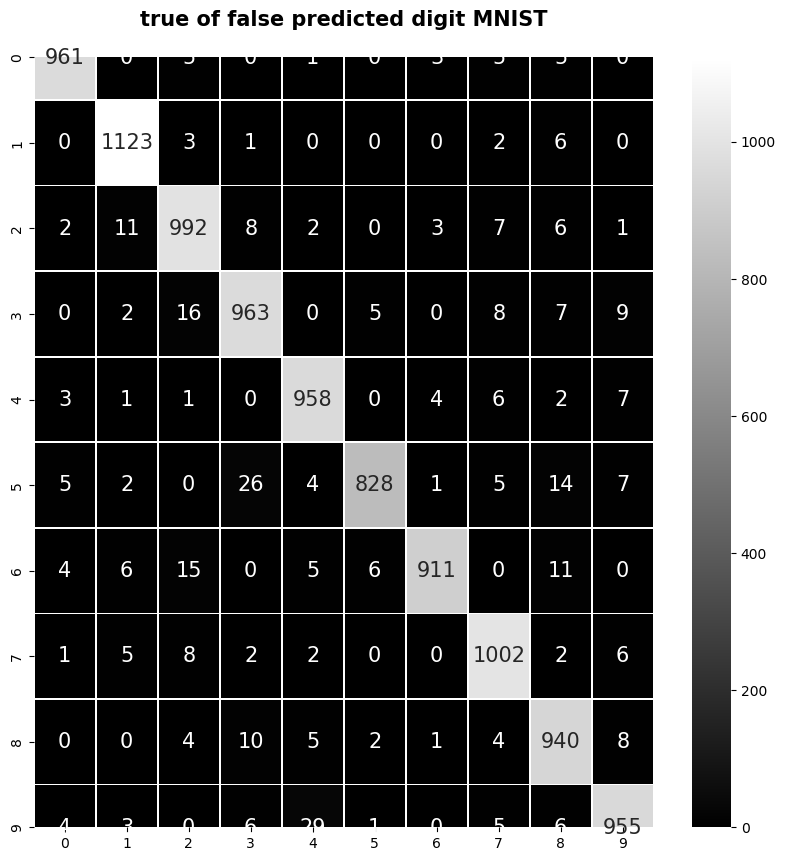

In [31]:
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('true of false predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.95      0.98      0.96       982
           5       0.98      0.93      0.96       892
           6       0.99      0.95      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.94      0.97      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



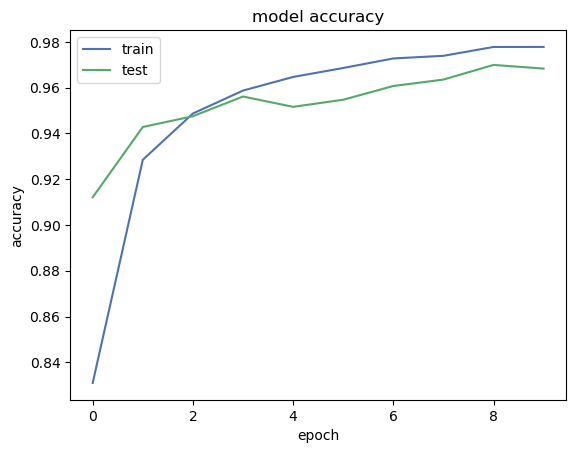

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

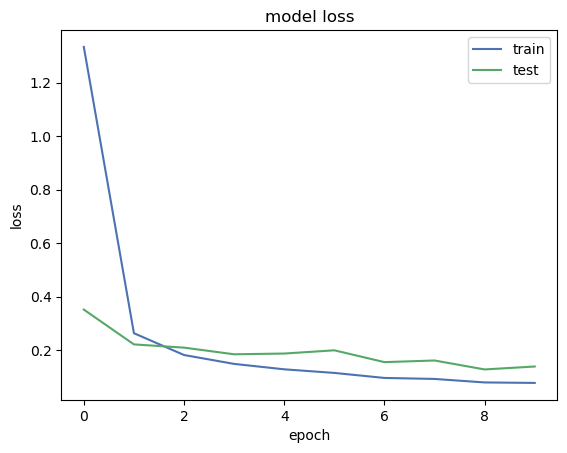

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [37]:
y_predict_single=model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

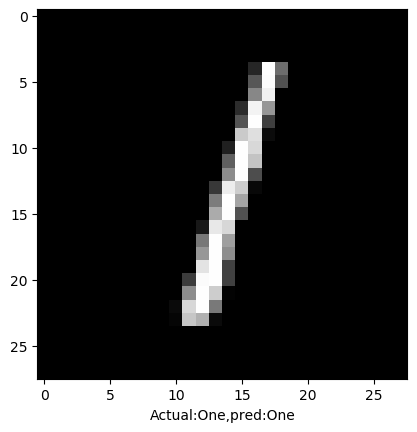

In [40]:
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
plt.imshow(X_test_digit[2].reshape(28,28),cmap='gray')
plt.xlabel('Actual:{},pred:{}'.format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()